In [11]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Documentation: I worked on this notebook with Swathi Samuel since I missed class during the lesson. 

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

Step 1: Hypothesis...State the null and alternative hypothesis:

    Null hypothesis: the woman is guessing at random.  She cannot distinguish between the cups where milk was added first and where the tea was added first.
    
    Alternative Hypothesis: The probability that she picks correctly is different than the probability she picks incorrectly. She can distinguish between the two. 

Step 2: Test Statistic:

    X = number of times she guessed correctly picked tea first. 
    
    Hypergeometric distribution 
    
    X_observed = 3
    
    X~Hypergeom(M=8,n=4,n=4)


Step 3: p-value



In [12]:
M,n,N=8,4,4
stats.hypergeom.rvs(M,n,N,size=10)

array([1, 1, 2, 3, 2, 2, 2, 3, 2, 1])

In [13]:
M,n,N=8,4,4
p_val = stats.hypergeom.pmf([3,4],M,n,N).sum()
print("the p-value is ", p_val)

the p-value is  0.24285714285714263


Step 4: 

We fail to reject the null.

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

In [14]:
iris=Table().read_table("iris.csv")
iris.group(4,np.mean)

species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: State hypotheses

Null: The mean sepal width is no different in the virginica than in the versicolor. 

Alternate: The mean sepal width of the virginica is greater than that of the versicolor. 

Step 2: Test Statistic

X=difference is the sample means

observed difference=0.204

If null is true, we should get a value near 0.

Using simulation/permutation test

Step 3: 

In [15]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs
iris_sub.show()

species,sepal_width
versicolor,3.2
versicolor,3.2
versicolor,3.1
versicolor,2.3
versicolor,2.8
versicolor,2.8
versicolor,3.3
versicolor,2.4
versicolor,2.9
versicolor,2.7


In [18]:
num_obs=iris_sub.num_rows
test_statistic=[]
for i in np.arange(10000):
    iris_sample=iris_sub.with_column("sampled",iris_sub.sample(num_obs,with_replacement=False).column(1))
    test_statistic=np.append(test_statistic,np.diff(iris_sample.group(0,np.mean).column(2))[0])

Step 4: Conclude

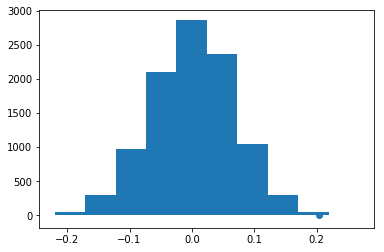

In [20]:
plt.hist(test_statistic)
plt.scatter(obs,0)
plt.show()

In [21]:
np.mean(test_statistic>=obs)

0.0009

We can reject the null due to the low p-value. 